In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [2]:
from transformers.tools import HfAgent
agent = HfAgent("https://api-inference.huggingface.co/models/bigcode/starcoder")
print("StarCoder is initialized 💪")

tool_config.json:   0%|          | 0.00/226 [00:00<?, ?B/s]

tool_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

tool_config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

tool_config.json:   0%|          | 0.00/450 [00:00<?, ?B/s]

chat_prompt_template.txt:   0%|          | 0.00/2.83k [00:00<?, ?B/s]

run_prompt_template.txt:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

StarCoder is initialized 💪


==Explanation from the agent==
I will use the following  tool: `image_generator` to generate an image.


==Code generated by the agent==
image = image_generator(prompt="a human singing")


==Result==


  0%|          | 0/25 [00:00<?, ?it/s]

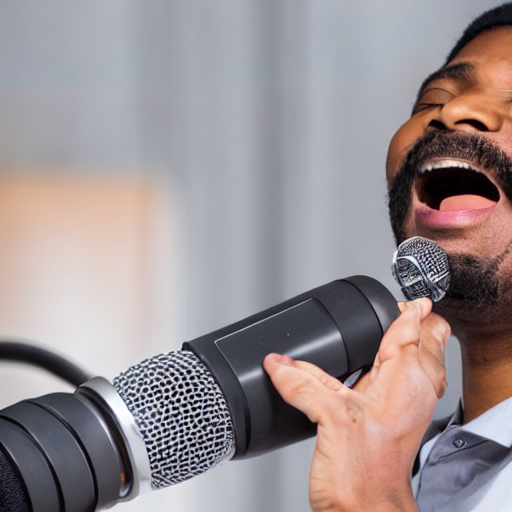

In [6]:
boat = agent.run("draw an image a human singing")
boat